# Product Recommendation Engine

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import requests
import urllib.request
from PIL import Image
from matplotlib.image import imread
import pickle
import warnings
warnings.filterwarnings('ignore')

## Load Pickle File Products_Dict, and unpickle it

In [4]:

products_dict = None
with open('./products_dict.pkl', 'rb') as pFile:
    products_dict = pickle.load(pFile)

## Load Product Description CSV

In [5]:
prod_des = pd.read_csv('./prod_overview.csv')

## Exploratory Data Analysis

In [6]:
products = pd.DataFrame.from_dict(products_dict)
products.head(5)
# products.to_csv('products.csv')

,product_title,product_main_image_url,app_sale_price,product_detail_url,product_id,evaluate_rate,original_price,manufacturer,prod_overview,price_range,RAM,ROM,total_des
0,"Samsung Galaxy S20 FE 5G (Cloud Navy, 8GB RAM,...",https://m.media-amazon.com/images/I/81vDZyJQ-4...,39990,https://www.amazon.in/dp/B08VB57558,B08VB57558,4.4/5,"₹74,999",Samsung,5G Ready powered by Qualcomm Snapdragon 865 Oc...,30k-40k,8.0,128,4.4/5 30k-40k Samsung 5G Ready powered by Qual...
1,"OPPO A55 (Rainbow Blue, 4GB RAM, 64GB Storage)...",https://m.media-amazon.com/images/I/71WImHX0la...,15490,https://www.amazon.in/dp/B09H7HKVLL,B09H7HKVLL,3.3/5,"₹18,990",OPPO,"6.51"" Inch (16.53cm) HD+ Punch Hole Display | ...",10k-20k,4.0,64,"3.3/5 10k-20k OPPO 6.51"" Inch (16.53cm) HD+ Pu..."
2,"Redmi 9A (Nature Green, 2GB RAM, 32GB Storage)...",https://m.media-amazon.com/images/I/71sxlhYhKW...,6999,https://www.amazon.in/dp/B08696XB4B,B08696XB4B,4.2/5,"₹8,499",Redmi,Country Of Origin - India13MP rear camera with...,1k-10k,2.0,32,4.2/5 1k-10k Redmi Country Of Origin - India13...
3,"Redmi 9 (Sky Blue, 4GB RAM, 64GB Storage) | 2....",https://m.media-amazon.com/images/I/71A9Vo1Bat...,8499,https://www.amazon.in/dp/B08697N43N,B08697N43N,4.2/5,"₹10,999",Redmi,"13+2MP Rear camera with AI Portrait, AI scene ...",1k-10k,4.0,64,4.2/5 1k-10k Redmi 13+2MP Rear camera with AI ...
4,"Samsung Galaxy M12 (Blue,4GB RAM, 64GB Storage...",https://m.media-amazon.com/images/I/71r69Y7BSe...,9499,https://www.amazon.in/dp/B08XGDN3TZ,B08XGDN3TZ,4.1/5,"₹12,999",Samsung,48MP+5MP+2MP+2MP Quad camera setup- True 48MP ...,1k-10k,4.0,64,4.1/5 1k-10k Samsung 48MP+5MP+2MP+2MP Quad cam...


In [7]:
prod_des.head(5)

,product_id,prod_overview
0,B08VB57558,5G Ready powered by Qualcomm Snapdragon 865 Oc...
1,B09H7HKVLL,"6.51"" Inch (16.53cm) HD+ Punch Hole Display | ..."
2,B08696XB4B,Country Of Origin - India13MP rear camera with...
3,B08697N43N,"13+2MP Rear camera with AI Portrait, AI scene ..."
4,B08XGDN3TZ,48MP+5MP+2MP+2MP Quad camera setup- True 48MP ...


In [8]:
products.shape, prod_des.shape

((257, 13), (257, 2))

In [9]:
prod_des.isnull().sum()

product_id       0
prod_overview    0
dtype: int64

In [10]:
products.isnull().sum()

product_title              0
product_main_image_url     0
app_sale_price             0
product_detail_url         0
product_id                 0
evaluate_rate              0
original_price            26
manufacturer               0
prod_overview              0
price_range                0
RAM                        0
ROM                        0
total_des                  0
dtype: int64

## Merging 2 Dataframes to create final DF for machine learning

In [11]:
final_df = pd.merge(products, prod_des, on='product_id')

## Exploratory Data Analysis

In [12]:
final_df.head(5)

,product_title,product_main_image_url,app_sale_price,product_detail_url,product_id,evaluate_rate,original_price,manufacturer,prod_overview_x,price_range,RAM,ROM,total_des,prod_overview_y
0,"Samsung Galaxy S20 FE 5G (Cloud Navy, 8GB RAM,...",https://m.media-amazon.com/images/I/81vDZyJQ-4...,39990,https://www.amazon.in/dp/B08VB57558,B08VB57558,4.4/5,"₹74,999",Samsung,5G Ready powered by Qualcomm Snapdragon 865 Oc...,30k-40k,8.0,128,4.4/5 30k-40k Samsung 5G Ready powered by Qual...,5G Ready powered by Qualcomm Snapdragon 865 Oc...
1,"OPPO A55 (Rainbow Blue, 4GB RAM, 64GB Storage)...",https://m.media-amazon.com/images/I/71WImHX0la...,15490,https://www.amazon.in/dp/B09H7HKVLL,B09H7HKVLL,3.3/5,"₹18,990",OPPO,"6.51"" Inch (16.53cm) HD+ Punch Hole Display | ...",10k-20k,4.0,64,"3.3/5 10k-20k OPPO 6.51"" Inch (16.53cm) HD+ Pu...","6.51"" Inch (16.53cm) HD+ Punch Hole Display | ..."
2,"Redmi 9A (Nature Green, 2GB RAM, 32GB Storage)...",https://m.media-amazon.com/images/I/71sxlhYhKW...,6999,https://www.amazon.in/dp/B08696XB4B,B08696XB4B,4.2/5,"₹8,499",Redmi,Country Of Origin - India13MP rear camera with...,1k-10k,2.0,32,4.2/5 1k-10k Redmi Country Of Origin - India13...,Country Of Origin - India13MP rear camera with...
3,"Redmi 9 (Sky Blue, 4GB RAM, 64GB Storage) | 2....",https://m.media-amazon.com/images/I/71A9Vo1Bat...,8499,https://www.amazon.in/dp/B08697N43N,B08697N43N,4.2/5,"₹10,999",Redmi,"13+2MP Rear camera with AI Portrait, AI scene ...",1k-10k,4.0,64,4.2/5 1k-10k Redmi 13+2MP Rear camera with AI ...,"13+2MP Rear camera with AI Portrait, AI scene ..."
4,"Samsung Galaxy M12 (Blue,4GB RAM, 64GB Storage...",https://m.media-amazon.com/images/I/71r69Y7BSe...,9499,https://www.amazon.in/dp/B08XGDN3TZ,B08XGDN3TZ,4.1/5,"₹12,999",Samsung,48MP+5MP+2MP+2MP Quad camera setup- True 48MP ...,1k-10k,4.0,64,4.1/5 1k-10k Samsung 48MP+5MP+2MP+2MP Quad cam...,48MP+5MP+2MP+2MP Quad camera setup- True 48MP ...


In [13]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 257 entries, 0 to 256
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   product_title           257 non-null    object 
 1   product_main_image_url  257 non-null    object 
 2   app_sale_price          257 non-null    object 
 3   product_detail_url      257 non-null    object 
 4   product_id              257 non-null    object 
 5   evaluate_rate           257 non-null    object 
 6   original_price          231 non-null    object 
 7   manufacturer            257 non-null    object 
 8   prod_overview_x         257 non-null    object 
 9   price_range             257 non-null    object 
 10  RAM                     257 non-null    float64
 11  ROM                     257 non-null    int64  
 12  total_des               257 non-null    object 
 13  prod_overview_y         257 non-null    object 
dtypes: float64(1), int64(1), object(12)
memory

In [14]:
final_df.isnull().sum()

product_title              0
product_main_image_url     0
app_sale_price             0
product_detail_url         0
product_id                 0
evaluate_rate              0
original_price            26
manufacturer               0
prod_overview_x            0
price_range                0
RAM                        0
ROM                        0
total_des                  0
prod_overview_y            0
dtype: int64

## Creating methods to Clean, Retrieve Desired Data

In [15]:
def isNaN(string):
    return string != string

In [16]:
def rating(s):
    if (isNaN(s)==False and len(s.split())):
        return s.split()[0]+'/5' 
    else:
        return ""

In [17]:
final_df['evaluate_rate'] = final_df['evaluate_rate'].apply(lambda x:rating(x))

## Extract and Refactor Product Prices

In [18]:
def process_price(price):
    return price.replace(",","") if (isNaN(price)==False) else ""

def gen_price_range(price):
    if not price: return '0'
    
    lp = len(price)
    if lp < 4: return '0k-1k'
    if lp < 5: return '1k-10k'
    head, tail = price[0] + '0'*(lp-4), str(int(price[0])+1) + '0'*(lp-4)
    return f'{head}k-{tail}k'

In [19]:
final_df['app_sale_price']=final_df['app_sale_price'].apply(lambda x:process_price(x))
final_df['price_range']=final_df['app_sale_price'].apply(lambda x:gen_price_range(x))

# final_df.loc[final_df['evaluate_rate']=="",'evaluate_rate']

## Exploratory Data Analysis

In [20]:
final_df.head(5)

,product_title,product_main_image_url,app_sale_price,product_detail_url,product_id,evaluate_rate,original_price,manufacturer,prod_overview_x,price_range,RAM,ROM,total_des,prod_overview_y
0,"Samsung Galaxy S20 FE 5G (Cloud Navy, 8GB RAM,...",https://m.media-amazon.com/images/I/81vDZyJQ-4...,39990,https://www.amazon.in/dp/B08VB57558,B08VB57558,4.4/5/5,"₹74,999",Samsung,5G Ready powered by Qualcomm Snapdragon 865 Oc...,30k-40k,8.0,128,4.4/5 30k-40k Samsung 5G Ready powered by Qual...,5G Ready powered by Qualcomm Snapdragon 865 Oc...
1,"OPPO A55 (Rainbow Blue, 4GB RAM, 64GB Storage)...",https://m.media-amazon.com/images/I/71WImHX0la...,15490,https://www.amazon.in/dp/B09H7HKVLL,B09H7HKVLL,3.3/5/5,"₹18,990",OPPO,"6.51"" Inch (16.53cm) HD+ Punch Hole Display | ...",10k-20k,4.0,64,"3.3/5 10k-20k OPPO 6.51"" Inch (16.53cm) HD+ Pu...","6.51"" Inch (16.53cm) HD+ Punch Hole Display | ..."
2,"Redmi 9A (Nature Green, 2GB RAM, 32GB Storage)...",https://m.media-amazon.com/images/I/71sxlhYhKW...,6999,https://www.amazon.in/dp/B08696XB4B,B08696XB4B,4.2/5/5,"₹8,499",Redmi,Country Of Origin - India13MP rear camera with...,1k-10k,2.0,32,4.2/5 1k-10k Redmi Country Of Origin - India13...,Country Of Origin - India13MP rear camera with...
3,"Redmi 9 (Sky Blue, 4GB RAM, 64GB Storage) | 2....",https://m.media-amazon.com/images/I/71A9Vo1Bat...,8499,https://www.amazon.in/dp/B08697N43N,B08697N43N,4.2/5/5,"₹10,999",Redmi,"13+2MP Rear camera with AI Portrait, AI scene ...",1k-10k,4.0,64,4.2/5 1k-10k Redmi 13+2MP Rear camera with AI ...,"13+2MP Rear camera with AI Portrait, AI scene ..."
4,"Samsung Galaxy M12 (Blue,4GB RAM, 64GB Storage...",https://m.media-amazon.com/images/I/71r69Y7BSe...,9499,https://www.amazon.in/dp/B08XGDN3TZ,B08XGDN3TZ,4.1/5/5,"₹12,999",Samsung,48MP+5MP+2MP+2MP Quad camera setup- True 48MP ...,1k-10k,4.0,64,4.1/5 1k-10k Samsung 48MP+5MP+2MP+2MP Quad cam...,48MP+5MP+2MP+2MP Quad camera setup- True 48MP ...


In [21]:
idx = final_df['product_title'][76].find("GB")

In [22]:
final_df['product_title'][10][idx-4:idx-3]

' '

In [23]:
final_df['product_title'][76][idx-2:idx].replace(" ","")

'4'

In [24]:
idx

30

In [25]:
final_df['product_title'][146]

'(Renewed) OnePlus Nord CE 5G (Charcoal Ink, 12GB RAM, 256GB Storage)'

In [26]:
idx1 = final_df['product_title'][0].rindex("GB")
if(idx1==-1): print(1)

In [27]:
final_df['product_title'][2][idx1-3:idx1].replace(" ","")

'|2'

In [28]:
final_df['product_title'][200]

'Xiaomi 11 Lite NE 5G (Diamond Dazzle 6GB RAM 128 GB Storage) | SD 778G (12 5G Bands) | 10-bit AMOLED with Dolby Vision | 1500 Amazon Coupon | Upto 12 Months No Cost EMI'

In [29]:
final_df['product_title'][76]

'Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Storage)'

## Data Extraction Methods

In [30]:
def get_ram(title):
    title=title.split(" ")
    title="".join(title)
    idx=title.find("GBRAM")
    if(idx!=-1):
        s=""
        idx=idx-1
        while(title[idx].isnumeric()):
            s=title[idx]+s
            idx=idx-1
        if(s!=''):
            return float(s)
        else:
            return 0.0
    else:
        return 0.0

In [31]:
def get_ram_(title):
    title=title.split(" ")
    title="".join(title)
    idx=title.find("GB")
    if(idx!=-1):
        s=""
        idx=idx-1
        while(title[idx].isnumeric()):
            s=title[idx]+s
            idx=idx-1
        if(s!=''):
            return float(s)
        else:
            return 0.5
    else:
        return 0.5

In [32]:
def get_rom_(title):
    if(title.find("128")!=-1):
        return 128.0
    elif(title.find("256")!=-1):
        return 256.0
    elif(title.find("64")!=-1):
        return 64.0
    elif(title.find("32")!=-1):
        return 32.0
    elif(title.find("16")!=-1):
        return 16.0
    elif(title.find("8")!=-1):
        return 8.0
    else:
        return 0.32

In [33]:
final_df['RAM'] = final_df['product_title'].apply(lambda x:get_ram(x))
final_df.loc[final_df['RAM'] == 0,'RAM'] = final_df.loc[final_df['RAM']==0,'product_title'].apply(lambda x:get_ram_(x))

In [34]:
final_df.loc[final_df['RAM']==32.0,'RAM']=2.0
final_df.loc[final_df['RAM']==16.0,'RAM']=2.0

In [35]:
final_df['RAM'].value_counts()

4.0     69
6.0     56
2.0     46
0.5     31
8.0     29
3.0     19
1.0      4
12.0     3
Name: RAM, dtype: int64

In [36]:
final_df['ROM']=final_df['product_title'].apply(lambda x:get_rom_(x))

In [37]:
final_df['ROM'].value_counts()

128.00    83
64.00     71
32.00     40
0.32      27
16.00     26
8.00       6
256.00     4
Name: ROM, dtype: int64

In [38]:
final_df.head(5)

,product_title,product_main_image_url,app_sale_price,product_detail_url,product_id,evaluate_rate,original_price,manufacturer,prod_overview_x,price_range,RAM,ROM,total_des,prod_overview_y
0,"Samsung Galaxy S20 FE 5G (Cloud Navy, 8GB RAM,...",https://m.media-amazon.com/images/I/81vDZyJQ-4...,39990,https://www.amazon.in/dp/B08VB57558,B08VB57558,4.4/5/5,"₹74,999",Samsung,5G Ready powered by Qualcomm Snapdragon 865 Oc...,30k-40k,8.0,128.0,4.4/5 30k-40k Samsung 5G Ready powered by Qual...,5G Ready powered by Qualcomm Snapdragon 865 Oc...
1,"OPPO A55 (Rainbow Blue, 4GB RAM, 64GB Storage)...",https://m.media-amazon.com/images/I/71WImHX0la...,15490,https://www.amazon.in/dp/B09H7HKVLL,B09H7HKVLL,3.3/5/5,"₹18,990",OPPO,"6.51"" Inch (16.53cm) HD+ Punch Hole Display | ...",10k-20k,4.0,64.0,"3.3/5 10k-20k OPPO 6.51"" Inch (16.53cm) HD+ Pu...","6.51"" Inch (16.53cm) HD+ Punch Hole Display | ..."
2,"Redmi 9A (Nature Green, 2GB RAM, 32GB Storage)...",https://m.media-amazon.com/images/I/71sxlhYhKW...,6999,https://www.amazon.in/dp/B08696XB4B,B08696XB4B,4.2/5/5,"₹8,499",Redmi,Country Of Origin - India13MP rear camera with...,1k-10k,2.0,32.0,4.2/5 1k-10k Redmi Country Of Origin - India13...,Country Of Origin - India13MP rear camera with...
3,"Redmi 9 (Sky Blue, 4GB RAM, 64GB Storage) | 2....",https://m.media-amazon.com/images/I/71A9Vo1Bat...,8499,https://www.amazon.in/dp/B08697N43N,B08697N43N,4.2/5/5,"₹10,999",Redmi,"13+2MP Rear camera with AI Portrait, AI scene ...",1k-10k,4.0,64.0,4.2/5 1k-10k Redmi 13+2MP Rear camera with AI ...,"13+2MP Rear camera with AI Portrait, AI scene ..."
4,"Samsung Galaxy M12 (Blue,4GB RAM, 64GB Storage...",https://m.media-amazon.com/images/I/71r69Y7BSe...,9499,https://www.amazon.in/dp/B08XGDN3TZ,B08XGDN3TZ,4.1/5/5,"₹12,999",Samsung,48MP+5MP+2MP+2MP Quad camera setup- True 48MP ...,1k-10k,4.0,64.0,4.1/5 1k-10k Samsung 48MP+5MP+2MP+2MP Quad cam...,48MP+5MP+2MP+2MP Quad camera setup- True 48MP ...


In [39]:
df = final_df.copy()

## Creating total_des column as concatenation of few columns

In [40]:
df['total_des']=df['evaluate_rate']+" "+df['price_range']+" "+df['manufacturer']+" "+df['prod_overview_y']

## Cleaning and Refactoring Data using Natural Language Toolkit

In [41]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import re
from sklearn.feature_extraction.text import TfidfVectorizer

In [42]:
def reSub1By1(features):
    pfs = []
    for i in range(0,len(features)):
        pf = re.sub('[^a-zA-Z0-9./-]',' ',features[i])
        pf = re.sub(r'^\s+',' ',pf)
        pf = re.sub(r'\s+[a-zA-Z]\s+',' ',pf)
        pf = re.sub(r'\s+',' ',pf)
        pf = pf.lower()
        pf = pf.split()
        pf = [WordNetLemmatizer().lemmatize(word) for word in pf if not word in set(stopwords.words('english'))]
        pf = " ".join(pf)
        pfs.append(pf)
    return pfs

def reSubChain(string:str, changes:list, pos = 0):
    if pos >= len(changes): return string
    return re.sub(changes[pos][0], changes[pos][1], reSubChain(string, changes, pos+1))



## Final data for ML Model

In [43]:
features = df['total_des']
processed_features = reSub1By1(features)
processed_features

['4.4/5/5 30k-40k samsung 5g ready powered qualcomm snapdragon 865 octa-core processor 8gb ram 128gb internal memory expandable 1tb android 11.0 operating system dual simtriple rear camera setup - 12mp dual pixel ois f1.8 wide rear camera 8mp ois tele camera 12mp ultra wide 30x space zoom single take night mode 32mp f2.2 front punch hole camera6.5-inch 16.40 centimeter infinity-o super amoled display 120hz refresh rate 1080 2400 fhd resolution 4500 mah battery non -removable super fast charging fast wireless charging finger print sensorip68 rated microsd card slot expandable upto 1 tb dual nano sim hybrid sim slot 5g 5g dual stand by5g ready powered qualcomm snapdragon 865 octa-core processor 8gb ram 128gb internal memory expandable 1tb android 11.0 operating system dual sim.triple rear camera setup - 12megapixels dual pixel ois f1.8 wide rear camera 8megapixels ois tele camera 12megapixels ultra wide 30x space zoom single take night mode 32megapixels f2.2 front punch hole camera.6.5-i

## Transforming text into numbers' representation for ML model

In [44]:
vectorizer = TfidfVectorizer (max_features=5000,min_df=5)
processed_features = vectorizer.fit_transform(processed_features).toarray()

## Using Cosine Similarity ML Method to recommend similar products

In [45]:
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(processed_features)

In [46]:
similarity[0].shape

(257,)

In [47]:
def display_img(url):
    urllib.request.urlretrieve(url,"IMG.png")
    img = Image.open("IMG.png")
    return img

## Recommender

In [48]:
def recommend(product):
    index = df[df['product_title'] == product].index[0]
    distances = sorted(list(enumerate(similarity[index])),reverse=True,key = lambda x: x[1])
    recomds = [distances[1], distances[7], distances[15], distances[20]]
    
    for i, prod in enumerate(recomds, 1):
        plt.figure(figsize = (10, 5))
        plt.subplot(1, 4, i)
        img = display_img(df.iloc[prod[0]].product_main_image_url)
        plt.imshow(img)
        print('\n\n\n', '-'*100, f"\n Item : {df.iloc[prod[0]].product_title} \n URL : {df.iloc[prod[0]].product_detail_url}\n", '-'*100)

## Finally, Recommend Products




 ---------------------------------------------------------------------------------------------------- 
 Item : Redmi 9A (Sea Blue 2GB RAM 32GB Storage) | 2GHz Octa-core Helio G25 Processor | 5000 mAh Battery 
 URL : https://www.amazon.in/dp/B086978F2L
 ----------------------------------------------------------------------------------------------------



 ---------------------------------------------------------------------------------------------------- 
 Item : Redmi 9 (Sporty Orange, 4GB RAM, 64GB Storage) | 2.3GHz Mediatek Helio G35 Octa core Processor 
 URL : https://www.amazon.in/dp/B08696W3B3
 ----------------------------------------------------------------------------------------------------



 ---------------------------------------------------------------------------------------------------- 
 Item : Redmi 7A (Matte Blue, 2GB RAM, 32GB Storage) 
 URL : https://www.amazon.in/dp/B07X3P1DR3
 ------------------------------------------------------------------------------------

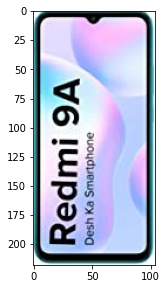

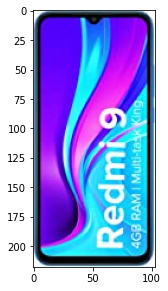

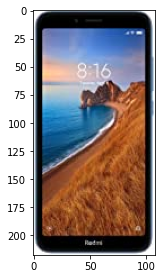

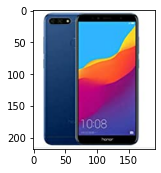

In [49]:
recommend('Redmi 9A (Nature Green, 2GB RAM, 32GB Storage) | 2GHz Octa-core Helio G25 Processor | 5000 mAh Battery')

In [464]:
# pickle.dump(df.to_dict(),open('products_dict.pkl','wb'))
# pickle.dump(similarity,open('similarity.pkl','wb'))